In [2]:
import ode
import numpy as np
import math
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

In [ ]:
#independent variablesg = 10 #N/kg
R = 1  #m
m1 = .1 #mass of penn 1
m2 = .1 #mass of penn 2
L1 = .8 #length of penn 1
L2 = .8 #length of penn 2
p1 = m1*vec(0,0,0) #momentum of penn 1
p2 = m2*vec(0,0,0) #momentum of penn 2
g = 10 #gravity

def doublePendulum(dep, t):  
    theta = dep[0]
    omega = dep[1]
    thetaTwo = dep[2]
    omegaTwo = dep[3]
    
    #dtheta / dt
    dtheta = omega
    #domega/ dt
    domega = (-g*(2*m1+m2)*np.sin(theta) - m2*g*np.sin(theta-2*thetaTwo) - 2*np.sin(theta-thetaTwo)*m2*((omegaTwo**2)*L2 + (omegaTwo**2)*L1*np.cos(theta-thetaTwo))) / (L1*((2*m1+m2)-(m2*cos(2*np.cos(2*theta-2*thetaTwo))))) #domega/dt
    
    #dtheta2 / dt
    dtheta2 = omegaTwo
    #domega2 / dt
    domega2 = (2*np.sin(theta-thetaTwo) * (omega*L1*(m1+m2) + g*(m1+m2)*np.cos(theta) + (omegaTwo**2)*L2*m2*np.cos(theta-thetaTwo))) / (L2*((2*m1+m2)-(m2*np.cos(2*np.cos(2*theta-2*thetaTwo))))) #equation for theta2 
    
    #array of dependent variables
    deriv = np.array([dtheta, domega, dtheta2, domega2])
    
    #This returns the value of the diff eq (i.e second deriv of theta 1 theta2)
    return deriv

In [3]:
#dependent variables
theta1 = np.pi/2
omega1 = 0
theta2 = np.pi/2
omega2 = 0

data = np.array([theta1, omega1, theta2, omega2]) #initialize array to store dependent variables

#independent variable
t = 0
h = 0.01
Nsteps = int(5/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
theta1arr = np.zeros(Nsteps)
omega1arr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
theta1arr[0] = theta1
omega1arr[0] = omega1
theta2arr[0] = theta2
omega2arr[0] = omega2

#create a time evolution loop
for n in range(1,Nsteps):
    
    data = ode.RK4(doublePendulum, data, t, h) #update [theta, omega]
    
    t = t + h #update values
    
    #store values in arrays
    tarr[n] = t
    
    #for the total energy
    y = -R*np.cos(data[0])
    v = R*np.cos(data[1])
    
    theta1arr[n] = data[0] #store theta
    omega1arr[n] = data[1] #store omega
    theta2arr[n] = data[2] #store theta2
    omega2arr[n] = data[3] #store omega2
     

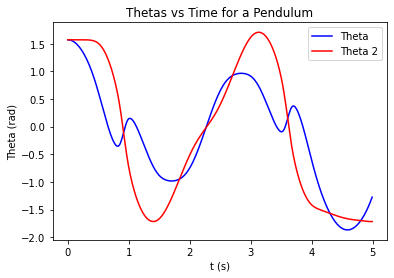

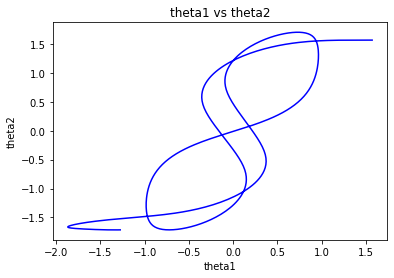

In [4]:
#Graph of Theta1 and Theta2 vs time
plt.figure()
plt.title("Thetas vs Time for a Pendulum")
plt.plot(tarr, theta1arr, 'b-', label='Theta')
plt.plot(tarr, theta2arr, 'r-', label='Theta 2')
plt.xlabel("t (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.show()

plt.figure()
plt.title("theta1 vs theta2")
plt.xlabel("theta1")
plt.ylabel("theta2")
plt.plot(theta1arr, theta2arr, 'b-')
plt.show()

In [ ]:
# create the ceiling, masses, and strings
scene = canvas()

#Ceiling
ceiling = box(pos=vector(-0.5,1,0), size = vector(0.2, 0.01, 0.2))

#Ball 1
ball1 = sphere(pos=vector(ceiling.pos.x+L1*sin(theta),ceiling.pos.y-L1*cos(theta),0), radius=0.05, color=color.green , make_trail=True,interval=40,retain=1e4) 
ball1.color=color.green

#Ball 2
ball2 = sphere(pos=vector(ceiling.pos.x+L1*sin(theta)+L2*sin(theta2),ceiling.pos.y-L1*cos(theta)-L2*cos(theta2),0), radius=0.05, color=color.cyan, make_trail=True,interval=20,retain=1e4) 
ball2.color=color.cyan

#rods
rod1 = cylinder(pos=ceiling.pos, axis=ball1.pos-ceiling.pos, color=color.white, radius=0.008)
rod2 = cylinder(pos=ball1.pos, axis=ball2.pos-ball1.pos, color=color.white, radius=0.008)

scene.pause()

## calculation loop
while t < 1e2:
    rate(100)
    
    #static position 
    #x1 = L1 * np.sin(theta)
    #y1 = -L1 * np.cos(theta)
    #x2 = x1 + L2*sin(theta2)
    #y2 = y1 + y1-L2*cos(theta2)
    
    #balll.pos = vec(R*np.sin(theta),-R*np.cos(theta),0)
    #rod1.axis = ball1.pos
    #bal2.pos = vec(R*np.sin(theta2),-R*np.cos(theta2),0)
    #rod2.axis = ball2.pos
    
    r1 = vector(ball1.pos.x - ceiling.pos.x,ball1.pos.y - ceiling.pos.y,ball1.pos.z - ceiling.pos.z)    
    r2 = vector(ball2.pos.x - ball1.pos.x,ball2.pos.y - ball1.pos.y,ball2.pos.z - ball1.pos.z)
    F1 = m1*vector(0,-g,0) - k*(r1 - L1*r1.norm()) + k*(r2 - L2*r2.norm())
    F2 = m2*vector(0,-g,0) - k*(r2 - L2*r2.norm())
    
    #updates the momentum and positions
    p1 = p1 + F1*h
    ball1.pos = ball1.pos + (p1/m1)*h
    rod1.axis = ball1.pos - ceiling.pos
    #rod1.pos = ball1.pos
    
    p2 = p2 + F2*h
    ball2.pos = ball2.pos + (p2/m2)*h
    rod2.axis = ball2.pos - ball1.pos
    rod2.pos = ball1.pos
    
    t = t + h

In [ ]:
# create the ceiling, masses, and strings
scene = canvas()

#Ceiling
ceiling = box(pos=vector(-0.5,1,0), size = vector(0.2, 0.01, 0.2))

#Ball 1
ball1 = sphere(pos=vector(ceiling.pos.x+L1*sin(theta1),ceiling.pos.y-L1*cos(theta1),0), radius=0.05, color=color.green , make_trail=True,interval=40,retain=1e4) 
ball1.color=color.green

#Ball 2
ball2 = sphere(pos=vector(ceiling.pos.x+L1*sin(theta2)+L2*sin(theta2),ceiling.pos.y-L1*cos(theta2)-L2*cos(theta2),0), radius=0.05, color=color.cyan, make_trail=True,interval=20,retain=1e4) 
ball2.color=color.cyan

#rods
rod1 = cylinder(pos=ceiling.pos, axis=ball1.pos-ceiling.pos, color=color.white, radius=0.008)
rod2 = cylinder(pos=ball1.pos, axis=ball2.pos-ball1.pos, color=color.white, radius=0.008)

scene.pause()

for theta in theta1arr:
    rate(100)
    ball1.pos = vector(ceiling.pos.x+L1*sin(theta),ceiling.pos.y-L1*cos(theta),0)    
    rod1.axis = ball1.pos
    for thetaTwo in theta2arr:
        rate(100)
        ball2.pos = vector(ceiling.pos.x+L1*sin(theta)+L2*sin(theta),ceiling.pos.y-L1*cos(theta)-L2*cos(theta),0)
        rod2.axis = ball2.pos


In [ ]:
# create the ceiling, masses, and strings
scene = canvas()

x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2*sin(theta2)
y2 = y1 + y1-L2*cos(theta2)
    

#Ball 1
ball1 = sphere(pos=vector(x1,y1,0), radius=0.05, color=color.green , make_trail=True,interval=40,retain=1e4) 
ball1.color=color.green

#Ball 2
ball2 = sphere(pos=vector(x2, y2,0), radius=0.05, color=color.cyan, make_trail=True,interval=20,retain=1e4) 
ball2.color=color.cyan

#rods
rod1 = cylinder(pos=vec(0,0,0),axis=ball1.pos, color=color.white, radius=0.008)
rod2 = cylinder(pos=ball1.pos, axis=ball2.pos-ball1.pos, color=color.white, radius=0.008)

scene.pause()

while t < 20: 
    for theta in theta1arr:
        rate(100)
        ball1.pos = vector(L1 * np.sin(theta),-L1 * np.cos(theta),0)    
        rod1.axis = ball1.pos
        for thetaTwo in theta2arr:
            rate(100)
            ball2.pos = vector(L1*sin(theta)+L2*sin(theta),y-L1*cos(theta)-L2*cos(theta),0)
            rod2.axis = ball1.pos

<IPython.core.display.Javascript object>